# Linear Reagression
**Dataset** use-Medical Insurance Cost Data.

**Objective** -Identify the factors(Independent variables) affecting the price of Medical Insurance. Train a model and check for the assumptions.



In [5]:
#importing libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# set the background for the graphs
from scipy.stats import skew
plt.style.use('ggplot')
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder


In [6]:
#Loading the dataset
Input_data = pd.read_csv('insurance.csv')

# Let's have a quick look at the dataset

Input_data.head()

,age,sex,bmi,children,smoker,region,charges,is_male,is_smoker,is_southwest,is_northeast,is_northwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,0,1


In [7]:
Input_data.shape

(1338, 12)

In [8]:
Input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   is_male       1338 non-null   int64  
 8   is_smoker     1338 non-null   int64  
 9   is_southwest  1338 non-null   int64  
 10  is_northeast  1338 non-null   int64  
 11  is_northwest  1338 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 125.6+ KB


In [9]:
#Descriptive statistics of the variables
Input_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges,is_male,is_smoker,is_southwest,is_northeast,is_northwest
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN,NaN,NaN,NaN,NaN,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265,0.505232,0.204783,0.242900,0.242152,0.242900
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237,0.500160,0.403694,0.428995,0.428546,0.428995
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515,1.000000,0.000000,0.000000,0.000000,0.000000


We have 3 categorical variables in our dataset: Sex, Smoker, and Region.

In [10]:
#Checking for missing values
df1=Input_data.isnull().sum().sort_values(ascending=False)
df1

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
is_male         0
is_smoker       0
is_southwest    0
is_northeast    0
is_northwest    0
dtype: int64

There is no missing value in our dataset

# Data Exploration
Doing Univariant analysis of independent variables

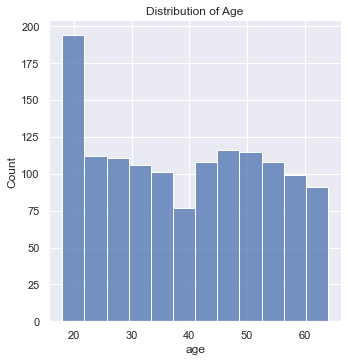

In [11]:
#Age variable
sns.displot(Input_data['age'])
plt.title('Distribution of Age')
plt.show()

Highest frequency is around age group of 20 and from 25 to 70 distribution is almost constant with a dip at age 40

<function matplotlib.pyplot.show(close=None, block=None)>

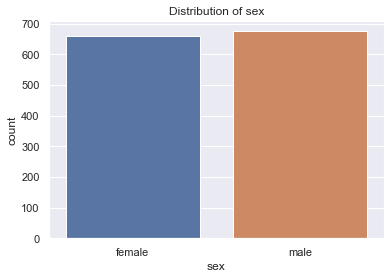

In [12]:
#Sex Variable
sns.countplot(x = 'sex', data = Input_data)
plt.title('Distribution of sex')
plt.show

Insight- Male and female count is almost equal.

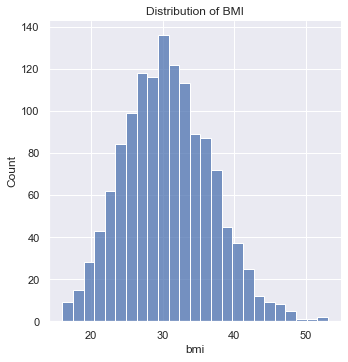

In [13]:
# distribution of bmi variable

sns.displot(Input_data['bmi'])
plt.title('Distribution of BMI')
plt.show()

BMI is following a normal distribution with some outliers.

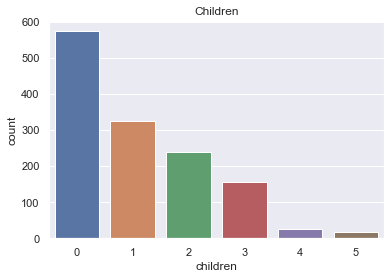

In [14]:
# plot of children variable

sns.countplot(x = 'children', data = Input_data)
plt.title('Children')
plt.show()

In our dataset majority of people are with no children. Then there are people having 1-3 children and there are very less people having 4-5 children.

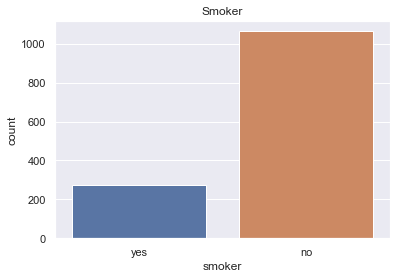

In [15]:
# plot of smoker variable

sns.countplot(x = 'smoker', data = Input_data)
plt.title('Smoker')
plt.show()

In our dataset clearly majority of datapoint are non-smoker

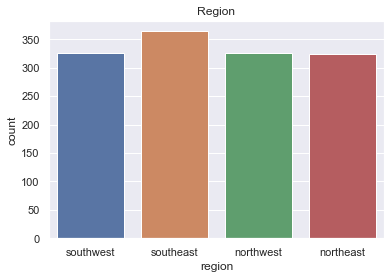

In [16]:
# plot of region variable

sns.countplot(x = 'region', data = Input_data)
plt.title('Region')
plt.show()

People are equally distributed in all the regions with southeast having slightly more number of people than other regions.

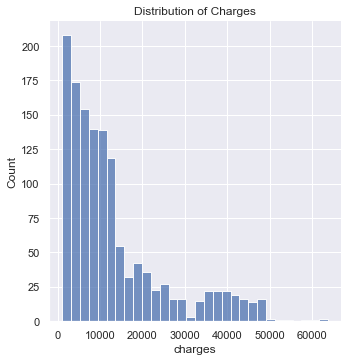

In [17]:
# distribution of charges variable

sns.displot(Input_data['charges'])
plt.title('Distribution of Charges')
plt.show()

With respect to prices our data is highly skewed.Mostly, the charges are around 1000-10,000

We will be procedding with all the features in our dataset. So next step will be encoding the categorical variable.

# Encoding the categorical features

In [18]:
# Categorical features: Sex, Smoker, and Region.

data = Input_data.copy()

# Assigning values for 'smoker' feature

data['smoker'] = data['smoker'].map({'yes':1, 'no':0})

data.head()

,age,sex,bmi,children,smoker,region,charges,is_male,is_smoker,is_southwest,is_northeast,is_northwest
0,19,female,27.900,0,1,southwest,16884.92400,0,1,1,0,0
1,18,male,33.770,1,0,southeast,1725.55230,1,0,0,0,0
2,28,male,33.000,3,0,southeast,4449.46200,1,0,0,0,0
3,33,male,22.705,0,0,northwest,21984.47061,1,0,0,0,1
4,32,male,28.880,0,0,northwest,3866.85520,1,0,0,0,1


In [19]:
#For 'sex' and 'region'-We will create dummy variable
df_encoded = pd.get_dummies(data, columns=['sex', 'region'],dtype=int)

print(df_encoded)




      age     bmi  children  smoker      charges  is_male  is_smoker  \
0      19  27.900         0       1  16884.92400        0          1   
1      18  33.770         1       0   1725.55230        1          0   
2      28  33.000         3       0   4449.46200        1          0   
3      33  22.705         0       0  21984.47061        1          0   
4      32  28.880         0       0   3866.85520        1          0   
...   ...     ...       ...     ...          ...      ...        ...   
1333   50  30.970         3       0  10600.54830        1          0   
1334   18  31.920         0       0   2205.98080        0          0   
1335   18  36.850         0       0   1629.83350        0          0   
1336   21  25.800         0       0   2007.94500        0          0   
1337   61  29.070         0       1  29141.36030        0          1   

      is_southwest  is_northeast  is_northwest  sex_female  sex_male  \
0                1             0             0           1     

In [20]:
#Descriptive statistics of the variables
df_encoded.describe(include='all')

,age,bmi,children,smoker,charges,is_male,is_smoker,is_southwest,is_northeast,is_northwest,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265,0.505232,0.204783,0.242900,0.242152,0.242900,0.494768,0.505232,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,0.403694,12110.011237,0.500160,0.403694,0.428995,0.428546,0.428995,0.500160,0.500160,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,0.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Linear Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
# Split the data into features (X) and target variable (y)
X = df_encoded.drop('charges', axis=1)  # Features
y = df_encoded['charges']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
regression_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          1.32e-305
Time:                        01:14:25   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6017.7374    538.378    -11.178      0.000   -7074.144   -4961.331
age                256.9757     13.477     19.067      0.000     230.530     283.421
bmi                337.0926     32.471     10.381      0.000     273.378     400.807
children           425.2788    154.655      2.750      0.006     121.814     728.743
smoker            1.183e+04    233.252     50.699      0.000    1.14e+04    1.23e+04
is_male          -2012.1097    215.220     -9.349      0.000   -2434.415   -1589.804
is_smoker         1.183e+04    233.252     50.699      0.000    1.14e+04    1.23e+04
is_southwest     -1358.8266    202.008     -6.727      0.000   -1755.207    -962.446
is_northeast      -953.9270    190.184     -5.016      0.000   -1327.106    -580.748
is_northwest     -1139.2656    196.216     -5.806      0.000   -1524.281    -754.251
sex_female       -4005.6277    384.400    -10.420      0.000   -4759.899   -3251.356
sex_male         -2012.1097    215.220     -9.349      0.000   -2434.415   -1589.804
region_northeast  -953.9270    190.184     -5.016      0.000   -1327.106    -580.748
region_northwest -1139.2656    196.216     -5.806      0.000   -1524.281    -754.251
region_southeast -2565.7182    381.425     -6.727      0.000   -3314.152   -1817.285
region_southwest -1358.8266    202.008     -6.727      0.000   -1755.207    -962.446
==============================================================================
Omnibus:                      252.330   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.798
Skew:                           1.253   Prob(JB):                    5.19e-134
Kurtosis:                       5.737   Cond. No.                     1.12e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.26e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Findings-**
* The R-squared value of 0.742 indicates that the model explains 74.2% of the variance in 'charges.'
* The coefficients (coef) show the estimated impact of each predictor on the 'charges' variable. For example, 'smoker' has a strong positive impact (coefficient of 2.365e+04), meaning that being a smoker is associated with significantly higher charges.
* The p-values (P>|t|) indicate the statistical significance of each predictor. Low p-values (typically < 0.05) suggest that a predictor is statistically significant in explaining the variance in 'charges.'
* The adjusted R-squared value (0.740) adjusts R-squared for the number of predictors, providing a more reliable measure of model goodness-of-fit.
* The model's F-statistic (380.9) assesses the overall significance of the model, with a very low p-value (1.32e-305), indicating that the model is statistically significant.
* Other statistics, such as the Durbin-Watson statistic (2.085) suggests no significant autocorrelation (residuals are independent)

# Checking Assumptions
1.No Multicollinearity

2.Mean of residuals should be 0

3.No Heteroscedasticity

4.Linearity of variables

5.Normality of error terms

6.No auto correlation among the residuals

# #1. No Multicollinearity- Multicollinearity refers to a statistical phenomenon in regression analysis where two or more independent variables in a model are highly correlated with each other.
It should not be in our data. We can check this using **Variance Inflation Factor (VIF)** values


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    X_matrix = X.values
    print(X_matrix)
    vif = [variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    
    return vif_factors
get_vif_factors(X)



[[19.   27.9   0.   ...  0.    0.    1.  ]
 [18.   33.77  1.   ...  0.    1.    0.  ]
 [28.   33.    3.   ...  0.    1.    0.  ]
 ...
 [18.   36.85  0.   ...  0.    1.    0.  ]
 [21.   25.8   0.   ...  0.    0.    1.  ]
 [61.   29.07  0.   ...  1.    0.    0.  ]]


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,column,VIF
0,age,1.016822
1,bmi,1.106630
2,children,1.004011
3,smoker,inf
4,is_male,inf
5,is_smoker,inf
6,is_southwest,inf
7,is_northeast,inf
8,is_northwest,inf
9,sex_female,inf


**age, bmi, children, smoker**: These predictor variables have VIF values close to 1, indicating little to no multicollinearity with other predictors.
**sex_female, sex_male, region_northeast, region_northwest, region_southeast, region_southwest:** have VIF as infinity.This happens because dummy variables created from categorical features, such as gender or regions, are perfectly correlated. For instance, if you know the gender is female, it automatically implies that it's not male (and vice versa), leading to a perfect linear relationship. Similarly, with regions, knowing three out of the four makes the fourth one redundant. To address this, it's common practice to drop one category from each set of perfectly multicollinear variables to eliminate extreme multicollinearity while maintaining model interpretability.

In [26]:
X_reduceddummy=X.drop(columns=['sex_female','region_northeast'])
get_vif_factors(X_reduceddummy)

[[19.   27.9   0.   ...  0.    0.    1.  ]
 [18.   33.77  1.   ...  0.    1.    0.  ]
 [28.   33.    3.   ...  0.    1.    0.  ]
 ...
 [18.   36.85  0.   ...  0.    1.    0.  ]
 [21.   25.8   0.   ...  0.    0.    1.  ]
 [61.   29.07  0.   ...  1.    0.    0.  ]]


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,column,VIF
0,age,1.016822
1,bmi,1.106630
2,children,1.004011
3,smoker,inf
4,is_male,inf
5,is_smoker,inf
6,is_southwest,inf
7,is_northeast,8.603069
8,is_northwest,inf
9,sex_male,inf


Now the dummy variables VIF value has decreassed. Now, **"age"** exhibits some level of multicollinearity, but it is not excessively high. **"bmi"** stands out with a relatively high VIF value, indicating a strong correlation with other predictors. On the other hand, **"children"** and **"smoker"** have low VIF values, suggesting little multicollinearity. **"sex_male,"** **"region_northwest,"** **"region_southeast,"** and **"region_southwest"** have moderate VIF values, indicating moderate multicollinearity. While multicollinearity is a concern in regression analysis, the degree observed here may not severely affect the model's interpretability or predictive power.

# Assumption 2: Mean of residuals should be 0

In [27]:
residuals = regression_model.resid
np.mean(residuals)

1.2428627597498839e-11

The residual mean is a very small number, which suggests that, on average, the regression model's predictions are indeed very close to the actual observed values, with very little bias. In other words, the model appears to be performing well in terms of its ability to predict the target variable accurately on average.

# Assumption 3-Homoscedasticity

The variance of the residuals, denoted as Var(ε), is constant for all values of the independent variables X. In other words, the spread or dispersion of the residuals should not change as you move along the predicted values.

In [28]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Add a constant column to X_train
X_train_with_const = sm.add_constant(X_train)

# Calculate the residuals
residuals = regression_model.resid 

# Perform the White test for heteroscedasticity
white_test_results = het_white(residuals, X_train_with_const)

# Extract the p-values from the test results
p_value = white_test_results[1]

# Check the p-value to determine if there is heteroscedasticity
if p_value < 0.05:
    print("Heteroscedasticity is detected (reject null hypothesis)")
else:
    print("No evidence of heteroscedasticity (fail to reject null hypothesis)")


Heteroscedasticity is detected (reject null hypothesis)


Assumption 3 is violated by our datset as Heteroscedasticty is present.

In [29]:
X_train_transformed = X_train.copy()  # Make a copy of the original data
X_train_transformed['bmi_log'] = np.log(X_train_transformed['bmi'])  # Logarithmic transformation

# Fit a new linear regression model with the transformed variable
model_transformed = sm.OLS(y_train, X_train_transformed).fit()

# Add a constant column to X_train_transformed
X_train_with_const = sm.add_constant(X_train_transformed)

# Fit a new linear regression model with the transformed variables and constant
model_transformed = sm.OLS(y_train, X_train_with_const).fit()

# Calculate the residuals from the transformed model
residuals_transformed = model_transformed.resid

# Perform the White's heteroskedasticity test on the transformed residuals
white_test_results_transformed = het_white(residuals_transformed, X_train_with_const)

# Extract the p-value from the transformed test results
p_value_transformed = white_test_results_transformed[1]

# Check if heteroscedasticity is present in the transformed model
if p_value_transformed < 0.05:
    print("Heteroscedasticity is detected in the transformed model (reject null hypothesis)")
else:
    print("No evidence of heteroscedasticity in the transformed model (fail to reject null hypothesis)")

Heteroscedasticity is detected in the transformed model (reject null hypothesis)


Even the log transformation is not able to remove hetroheteroscedasticity. We can use-
**Weighted Least Squares (WLS):** In this method, we assign different weights to each observation based on the variance of the residuals. Observations with larger residuals receive smaller weights, and observations with smaller residuals receive larger weights. This gives more importance to data points with smaller errors, which can help mitigate heteroscedasticity.

In [30]:
from statsmodels.regression.linear_model import WLS

# Fit a new linear regression model with the transformed variable
model_transformed = sm.OLS(y_train, X_train_with_const).fit()

# Calculate the residuals from the transformed model
residuals_transformed = model_transformed.resid

# Fit a weighted least squares (WLS) model
wls_model = WLS(y_train, X_train_with_const, weights=1 / (residuals_transformed**2))
wls_results = wls_model.fit()

# View the summary of WLS results
print(wls_results.summary())

# Perform the White's heteroskedasticity test on the WLS residuals
white_test_results_wls = het_white(wls_results.resid, X_train_with_const)
p_value_wls = white_test_results_wls[1]

# Check if heteroscedasticity is present in the WLS model
if p_value_wls < 0.05:
    print("Heteroscedasticity is detected in the WLS model (reject null hypothesis)")
else:
    print("No evidence of heteroscedasticity in the WLS model (fail to reject null hypothesis)")

                            WLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.997
Model:                            WLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.191e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:14:25   Log-Likelihood:                -9801.6
No. Observations:                1070   AIC:                         1.962e+04
Df Residuals:                    1060   BIC:                         1.967e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.112e+04   2606.520  

In [31]:
from statsmodels.regression.linear_model import WLS
from statsmodels.stats.diagnostic import het_white

# Fit a weighted least squares (WLS) model
wls_model = WLS(y_train, X_train_with_const, weights=1 / (residuals_transformed**2))
wls_results = wls_model.fit(cov_type='HC3')  # Use robust standard errors

# Calculate the residuals from the WLS model
residuals_wls = wls_results.resid

# Perform the White's heteroscedasticity test on the residuals
white_test_results_wls = het_white(residuals_wls, X_train_with_const)

# Extract the p-value from the test results
p_value_wls = white_test_results_wls[1]

# Check if heteroscedasticity is present in the WLS model
if p_value_wls < 0.05:
    print("Heteroscedasticity is detected in the WLS model (reject null hypothesis)")
else:
    print("No evidence of heteroscedasticity in the WLS model (fail to reject null hypothesis)")

# Print the summary of the WLS model results
print(wls_results.summary())


Heteroscedasticity is detected in the WLS model (reject null hypothesis)
                            WLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.997
Model:                            WLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.862e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:14:25   Log-Likelihood:                -9801.6
No. Observations:                1070   AIC:                         1.962e+04
Df Residuals:                    1060   BIC:                         1.967e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 10
  warnings.warn('covariance of constraints does not have full '


Tried several methods still getting heteroscedasticity like Outlier Detection etc

# Checking Assumption 4: Linearity of variables

We can check this by using residuals vs. Fitted Values Plot: Another common method is to create a scatterplot of the residuals (the differences between the actual and predicted values) against the fitted values (the predicted values). In a linear model, you would expect these residuals to be randomly scattered around zero without any noticeable patterns. Patterns in this plot may indicate a lack of linearity.

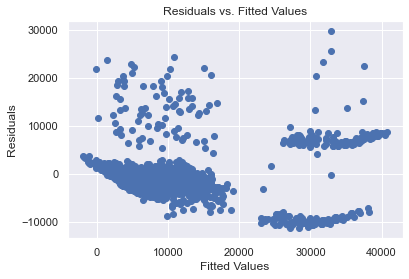

In [32]:
plt.scatter(regression_model.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

Assumption 4 is satisfied.

# Checking Assumption 5: Normality of error terms

The residuals should be normally distributed. this can be tested by either looking at distribution plot for residuals or by QQ plot for residuals

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

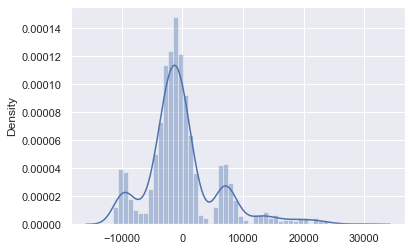

In [33]:
sns.distplot(residuals)

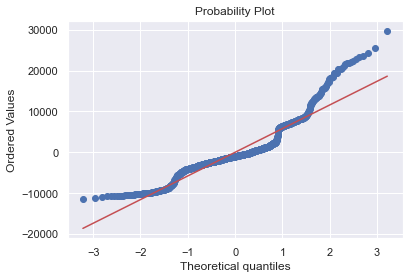

In [34]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

The residuals have a distribution close to normal distribution.

# Assumption 6: No auto correlation among the residuals.


We have already tetsed this and gor thr result of Durbin-Watson statistics value in our OLS summary, which came out to be 2.085 suggesting no significant autocorrelation (residuals are independent).

The Durbin-Watson statistic typically ranges from 0 to 4:

**A value close to 2:** indicates that there is no significant autocorrelation detected in the residuals.

**A value less than 2:** A Durbin-Watson statistic below 2 suggests positive autocorrelation in the residuals. This means that the residuals tend to be positively correlated with each other.

**A value greater than 2:** A Durbin-Watson statistic above 2 suggests negative autocorrelation in the residuals. This means that the residuals tend to be negatively correlated with each other.


In [35]:
durbin_watson_stat = sm.stats.durbin_watson(residuals)
print("Durbin-Watson statistic:", durbin_watson_stat)

Durbin-Watson statistic: 2.0854107284998724


Durbin-Watson statistic value is close to 2 indicates that there is no significant autocorrelation detected in the residuals.

## XG Boost

Although XGBoost is primarily known for its effectiveness in non-linear modeling and tree-based ensembles, such as classification and regression trees (CART) and gradient boosting, it can be used for linear regressio. It doesn't inherently strengthen or improve linear regression itself. Instead, it provides a flexible framework that can be adapted for linear regression tasks when needed.

In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset and prepare the features (X) and target variable (Y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y., test_size=0.2, random_state=42)

# Create an XGBoost Regressor with linear regression objective
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 22454415.79
R-squared (R2): 0.86


As we can see improvement in R2 from 0.742 to 0.86 suggests that XGBoost is better suited to model the relationship between the independent and dependent variables in your dataset. It's not uncommon for machine learning models like XGBoost to outperform linear regression, especially when dealing with complex or non-linear data patterns.

However, the trade-off between accuracy and explainability is crucial. XGBoost excels in accuracy but lacks interpretability, while linear models like OLS are interpretable but may sacrifice some predictive power. The choice depends on your application's needs and the importance of transparency, trust, fairness, and compliance. Hybrid approaches or interpretability techniques can bridge the gap, but always involve domain experts and stakeholders in the decision-making process.